In [22]:
#import libary for use method
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [23]:
#reading the dataset
emp_df=pd.read_csv('empl.csv')

In [24]:
emp_df.head()

,SNo,Name,Age,City,Country,Salary
0,1,Tom,28.0,Toronto,Canada,20000.0
1,2,Lee,31.0,Edmonto,Canada,3900.0
2,3,Dave,34.0,Toronto,Canada,8000.0
3,4,Anik,26.0,HongKong,Asia,66672.0
4,5,kamal,30.0,NaN,America,NaN


In [25]:
emp_df.shape

(22, 6)

In [26]:
emp_df.columns

Index(['SNo', 'Name', 'Age', 'City', 'Country', 'Salary'], dtype='object')

In [27]:
emp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   SNo      22 non-null     int64  
 1   Name     22 non-null     object 
 2   Age      19 non-null     float64
 3   City     19 non-null     object 
 4   Country  22 non-null     object 
 5   Salary   19 non-null     float64
dtypes: float64(2), int64(1), object(3)
memory usage: 1.2+ KB


In [28]:
#checking the datatype
emp_df.dtypes

SNo          int64
Name        object
Age        float64
City        object
Country     object
Salary     float64
dtype: object

In [29]:
emp_df.describe()

,SNo,Age,Salary
count,22.000000,19.000000,19.000000
mean,12.090909,32.421053,33739.947368
std,6.927578,7.174924,23151.188084
min,1.000000,22.000000,3900.000000
25%,6.250000,27.000000,8888.000000
50%,12.500000,31.000000,33451.000000
75%,17.750000,36.000000,54666.000000
max,23.000000,50.000000,67666.000000


In [30]:
emp_df.isnull().sum()

SNo        0
Name       0
Age        3
City       3
Country    0
Salary     3
dtype: int64

In [31]:
#Missing values Imputation
mean_age=emp_df['Age'].mean()
age=float(mean_age)
emp_df['Age'].fillna(age,inplace=True)


mean_salary=emp_df['Salary'].mean()
salary=float(mean_salary)
emp_df['Salary'].fillna(salary,inplace=True)

emp_df['City'].fillna('Unknown',inplace=True)



In [32]:
emp_df.isnull().sum()

SNo        0
Name       0
Age        0
City       0
Country    0
Salary     0
dtype: int64

In [33]:
emp_df.describe()

,SNo,Age,Salary
count,22.000000,22.000000,22.000000
mean,12.090909,32.421053,33739.947368
std,6.927578,6.642689,21433.835262
min,1.000000,22.000000,3900.000000
25%,6.250000,27.250000,11666.000000
50%,12.500000,31.500000,33739.947368
75%,17.750000,34.000000,49633.000000
max,23.000000,50.000000,67666.000000


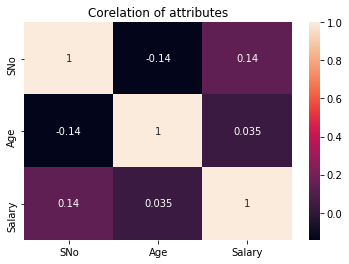

In [34]:
sns.heatmap(emp_df.corr(), annot=True).set_title("Corelation of attributes")
plt.show()

In [44]:
#seprating into input and output variables
df_x=emp_df.drop(columns=['Salary','Name','City','Country'])
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
df_x=ss.fit_transform(df_x)
y=emp_df.iloc[:,-1]

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
def maxr2_score(regr,df_x,y):
    max_r_score=0
    for r_state in range(42,101):
        x_train,x_test,y_train,y_test=train_test_split(df_x,y,random_state=r_state,test_size=0.20)
        regr.fit(x_train,y_train)
        y_pred=regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        print('r2_score corresponding to random state: ',r_state,"is:",r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print('\n\nmax r2 score corresponding to random state:',final_r_state,"is",max_r_score)
    return final_r_state

In [46]:
#lets use linear regression and check max  r2 score corresponding to different random states
from sklearn.linear_model import LinearRegression
lreg=LinearRegression()
r_state=maxr2_score(lreg,df_x,y)


r2_score corresponding to random state:  42 is: -0.2773256982933925
r2_score corresponding to random state:  43 is: -0.6259884188331819
r2_score corresponding to random state:  44 is: -0.44480889486477637
r2_score corresponding to random state:  45 is: -2.883111822699885
r2_score corresponding to random state:  46 is: -0.6939279831808713
r2_score corresponding to random state:  47 is: -0.7194598162458332
r2_score corresponding to random state:  48 is: -0.7179240610104549
r2_score corresponding to random state:  49 is: -0.12143778819486539
r2_score corresponding to random state:  50 is: -0.12279637334814031
r2_score corresponding to random state:  51 is: -0.22460806622969565
r2_score corresponding to random state:  52 is: -0.7105500742961706
r2_score corresponding to random state:  53 is: -0.07896729841638228
r2_score corresponding to random state:  54 is: -1.1815487110927392
r2_score corresponding to random state:  55 is: -0.03165658765204182
r2_score corresponding to random state:  56

In [47]:
x_train,x_test,y_train,y_test=train_test_split(df_x,y,random_state=71,test_size=0.20)
lreg=LinearRegression()        
lreg.fit(x_train,y_train)
y_pred=lreg.predict(x_test)

In [48]:
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("RMSE is : ",np.sqrt(mean_squared_error(y_test,y_pred)))
print('r2_score is : ',r2_score(y_test,y_pred))


RMSE is :  14487.1495454212
r2_score is :  0.04501184748071019


In [49]:
from sklearn.externals import joblib
joblib.dump(lreg,'empl_salary_model.csv')

['empl_salary_model.csv']

In [50]:
model=joblib.load('empl_salary_model.csv')

In [43]:
model.predict(x_test)

array([30501.48862712, 31292.88698784, 34834.6020187 , 32452.57589958,
       37961.04027682])